Statistic analysis to start comparation betweens two similars clubs. First of all, we obtain the correct path to the respective experiments.   

In [409]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [410]:
#Define path to the experiments
Barcelona = "../Data/FCBarcelona/03Stage/finalMetadataBarcelona.csv"
RayoVallecano = "../Data/RVallecano/03Stage/finalMetadataRayo Vallecano.csv"

In [411]:
try:
    # Read the CSV files into DataFrames
    metadataBarcelona = pd.read_csv(Barcelona, sep=",")
    metadataRayoVallecano = pd.read_csv(RayoVallecano, sep=",")
    #metadataArsenal = pd.read_csv(Arsenal, sep=",")
    # Now metadataManUnited and metadataManCity contain the data from the CSV files
except FileNotFoundError:
    print("One of the files does not exist or the path is incorrect.")
except Exception as e:
    print("An error occurred:", str(e))


In [412]:
def filterTeam(df):
    filteredDf = df[df["Score"] != "NF"]
    return filteredDf


In [413]:
def aggregateStatistics(df):
    groupedData = df.groupby('Score').agg(
        totalNumberOfMatches=('Score', 'count'),  # Number of splits with the same score
        totalPasses=('completePasses', 'sum'),     # Total amount of passes to reach that score
        meanPasses=('completePasses', 'mean'),      # Mean number of passes to reach that score
        deviationPasses=('completePasses', 'std'),   # Standard deviation of passes to reach that score
        meanMinutes=('minutes', 'mean'),      # Mean number of minutes to reach that score
        deviationMinutes=('minutes', 'std')   # Standard deviation of minutes to reach that score
    ).reset_index()  # Reset the index to have a flat DataFrame

    return groupedData


In [414]:
def plotBoxPlotForEachScore(goalsTeam):
   plt.figure(figsize=(12, 6))
   scores = goalsTeam['Score'].unique()
   scores_sorted = sorted(scores, key=lambda x: str(x))
   sns.boxplot(data=goalsTeam[goalsTeam.groupby('Score')['Score'].transform('count') >= 1], x="Score", y="passes", order=scores_sorted, fill=False)
   plt.xlabel('Score', fontsize='large')
   plt.ylabel('Passes', fontsize='large')
   plt.title('Passes per score', fontsize='large')
   plt.yticks(range(0, int(max(goalsTeam['passes'])) + 100, 50))   
   plt.show()
   

In [415]:
def plotScatterPlotForEachScore(goalsTeam):
    plt.figure(figsize=(10, 10))
    
    # Adding scatter plot using Seaborn
    sns.scatterplot(data=goalsTeam, x='Score', y='minutes', hue='minutes', palette='tab10')

    # Customize y-axis ticks with a gap of 5 minutes
    plt.yticks(range(0, int(max(goalsTeam['minutes'])) + 1, 5))
    
    # Specify the size and location of the legend
    plt.legend(ncol=3, fontsize='large', columnspacing=0.5)
    plt.xlabel('Score', fontsize='large')
    plt.ylabel('Minute', fontsize='large')
    plt.title('Goals per minute', fontsize='large')
    # Show the plot
    plt.show()


In [416]:
'''
def plotScatterPlotForEachScore(goalsTeam):
    plt.figure(figsize=(10, 6.5))
    
    # Adding scatter plot using Seaborn
    sns.scatterplot(data=goalsTeam, x='minutes', y='Score', hue='minutes', palette='tab10', legend = False)

    # Customize y-axis ticks with a gap of 5 minutes
    plt.xticks(range(0, int(max(goalsTeam['minutes'])) + 1, 5))
    
    # Show the plot
    plt.show()
'''

"\ndef plotScatterPlotForEachScore(goalsTeam):\n    plt.figure(figsize=(10, 6.5))\n    \n    # Adding scatter plot using Seaborn\n    sns.scatterplot(data=goalsTeam, x='minutes', y='Score', hue='minutes', palette='tab10', legend = False)\n\n    # Customize y-axis ticks with a gap of 5 minutes\n    plt.xticks(range(0, int(max(goalsTeam['minutes'])) + 1, 5))\n    \n    # Show the plot\n    plt.show()\n"

In [417]:
'''
def plotBoxPlotForEachScore(goalsTeam, uniqueScores):
    for score in uniqueScores:
        plt.figure()  # Create a new figure for each box plot
        box = plt.boxplot(goalsTeam[goalsTeam.Score == score]['completePasses'], showmeans=True, meanline=True)
        
        # Set labels for x-axis and y-axis
        plt.xlabel('Score')  # Add label for x-axis
        plt.ylabel('Total Passes')  # Add label for y-axis
        
        # Add title for the box plot (optional)
        plt.title(f'Box Plot for Score: {score}') 
               
        # Extract mean and median lines
        mean_line = box["means"][0]
        median_line = box["medians"][0]
        
        # Add legend with lines indicating mean and median
        plt.legend([mean_line, median_line], ['Mean', 'Median'])
        
        # Show the plot
        plt.show()
'''

'\ndef plotBoxPlotForEachScore(goalsTeam, uniqueScores):\n    for score in uniqueScores:\n        plt.figure()  # Create a new figure for each box plot\n        box = plt.boxplot(goalsTeam[goalsTeam.Score == score][\'completePasses\'], showmeans=True, meanline=True)\n        \n        # Set labels for x-axis and y-axis\n        plt.xlabel(\'Score\')  # Add label for x-axis\n        plt.ylabel(\'Total Passes\')  # Add label for y-axis\n        \n        # Add title for the box plot (optional)\n        plt.title(f\'Box Plot for Score: {score}\') \n               \n        # Extract mean and median lines\n        mean_line = box["means"][0]\n        median_line = box["medians"][0]\n        \n        # Add legend with lines indicating mean and median\n        plt.legend([mean_line, median_line], [\'Mean\', \'Median\'])\n        \n        # Show the plot\n        plt.show()\n'

In [418]:
def plotCumulativeDistributionForEachScore(goalsTeam, uniqueScores):
    for score in uniqueScores:
        s10 = np.sort(goalsTeam[goalsTeam.Score == score].completePasses)
        # Calculate cumulative distribution
        cum_data = np.cumsum(s10) / np.sum(s10)
        
        # Plot cumulative distribution
        plt.plot(s10, cum_data, label=f'Score: {score}')  # Add label for the current score
        
        # Add labels and title
        plt.xlabel('Total Passes')
        plt.ylabel('Cumulative Distribution')
        plt.title(f'Cumulative Distribution of Total Passes by Score: {score}')
        plt.legend()  # Show legend with score labels
        
        # Show the plot for the current score
        plt.show()


Arsenal

In [419]:
#goalsArsenal = filterTeam(metadataArsenal, "Arsenal")

In [420]:
#groupedDataTableArsenal = aggregateStatistics(goalsArsenal)

In [421]:

#print(tabulate(groupedDataTableArsenal, headers='keys', tablefmt='psql'))

In [422]:
#plotBoxPlotForEachScore(goalsArsenal)

Barcelona

In [423]:
goalsBarcelona = filterTeam(metadataBarcelona)

In [424]:
groupedDataTableBarcelona = aggregateStatistics(goalsBarcelona)

In [425]:
# Round the values
df = groupedDataTableBarcelona.round(2)

print(tabulate(df, headers='keys', tablefmt='psql'))


+----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------+
|    |   Score |   totalNumberOfMatches |   totalPasses |   meanPasses |   deviationPasses |   meanMinutes |   deviationMinutes |
|----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------|
|  0 |     0_1 |                      9 |          1370 |       152.22 |            105.42 |         23    |              17.61 |
|  1 |     0_2 |                      3 |           149 |        49.67 |             50.86 |          9    |               7.81 |
|  2 |     0_3 |                      1 |           127 |       127    |            nan    |         26    |             nan    |
|  3 |     1_0 |                     28 |          5210 |       186.07 |            133.77 |         27.18 |              20.27 |
|  4 |     1_1 |                     13 |          1200 |        92.31 |            115.91

In [426]:
print(df["totalNumberOfMatches"].sum())

141


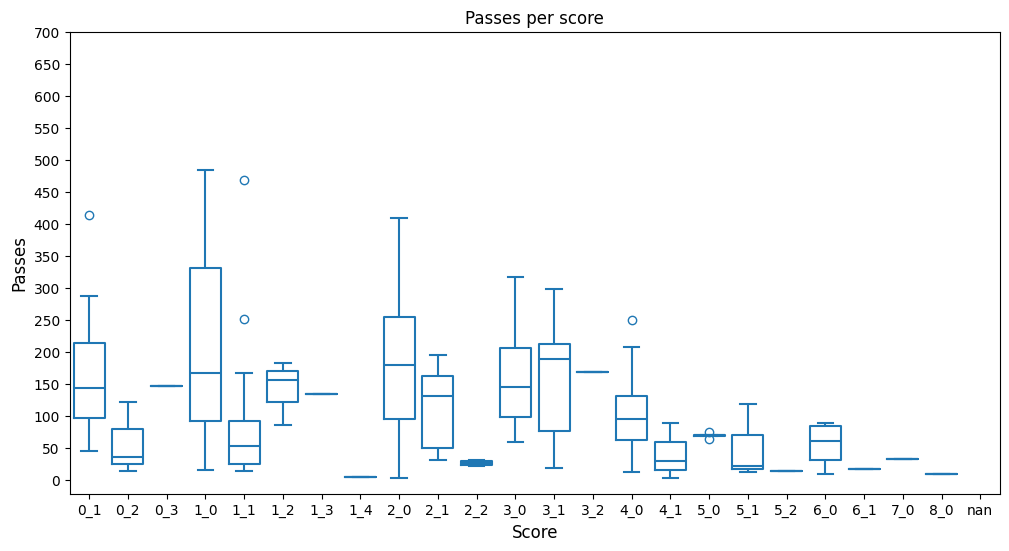

In [427]:
plotBoxPlotForEachScore(goalsBarcelona)

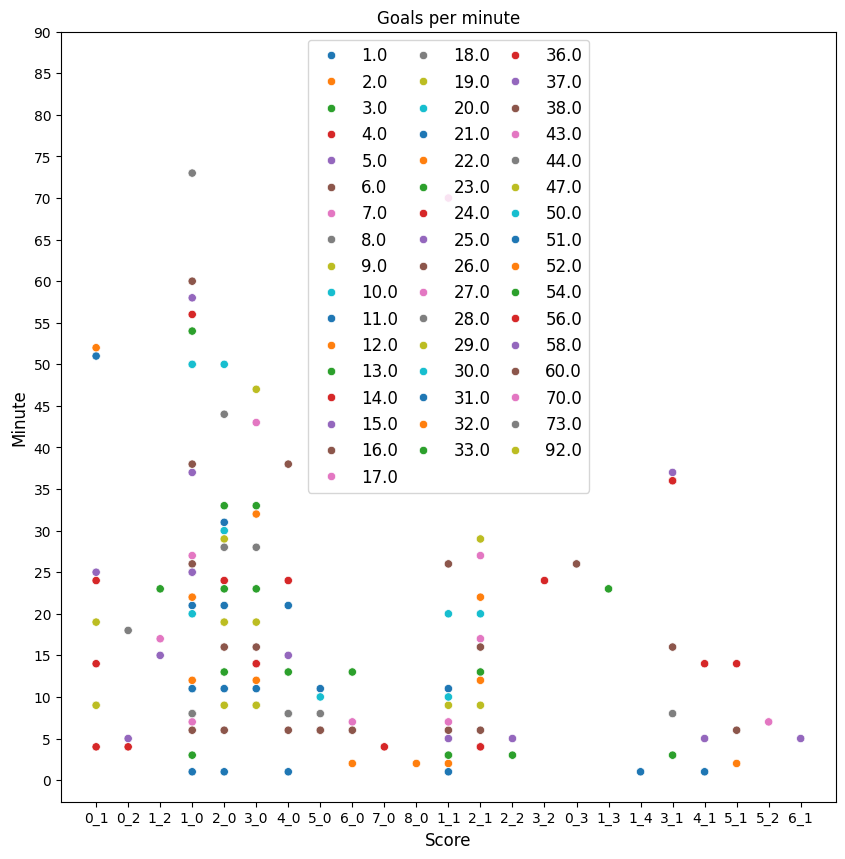

In [428]:
plotScatterPlotForEachScore(goalsBarcelona)


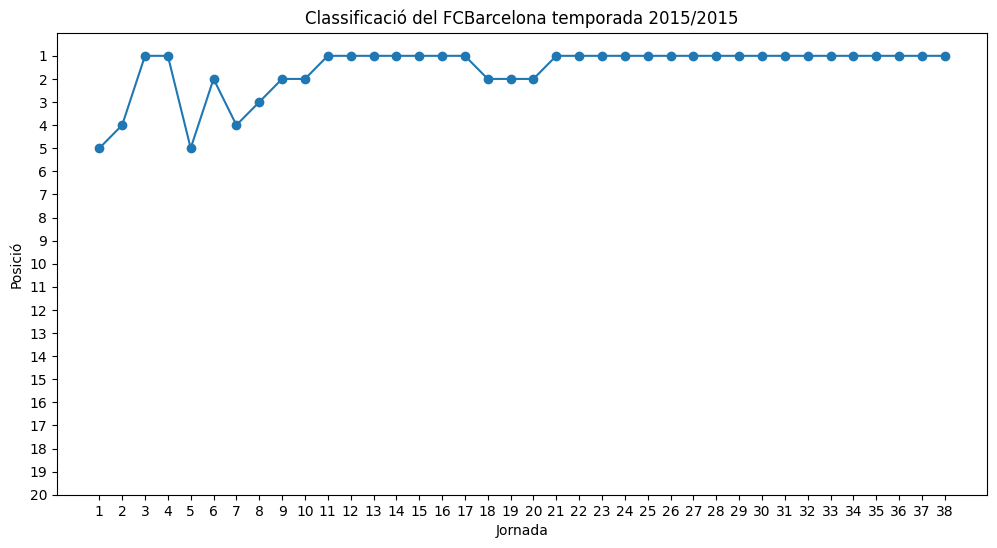

In [429]:
rounds = [i for i in range(1, 39)]
positions = [5, 4, 1, 1, 5, 2, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure(figsize=(12, 6))
plt.plot(rounds, positions, marker='o', linestyle='-')
plt.title('Classificació del FCBarcelona temporada 2015/2015')
plt.xlabel('Jornada')
plt.ylabel('Posició')
plt.xticks(range(1, 39))
plt.ylim(19, 0)  # Reverse the y-axis
plt.yticks(range(1, 21))  # Set y-axis ticks with a gap of 1
plt.gca().patch.set_facecolor('none')  # Remove background
plt.grid(False)  # Remove grid
plt.show()

Rayo Vallecano

In [430]:
goalsVallecano = filterTeam(metadataRayoVallecano)

In [431]:
groupedDataTableRVallecano = aggregateStatistics(goalsVallecano)

In [432]:
df = groupedDataTableRVallecano.round(2)

print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------+
|    |   Score |   totalNumberOfMatches |   totalPasses |   meanPasses |   deviationPasses |   meanMinutes |   deviationMinutes |
|----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------|
|  0 |     0_1 |                     21 |          2091 |        99.57 |            107.98 |         23.76 |              25.52 |
|  1 |     0_2 |                      9 |           841 |        93.44 |             79.34 |         17.11 |              14.34 |
|  2 |     0_3 |                      2 |           273 |       136.5  |             24.75 |         32.5  |               3.54 |
|  3 |     1_0 |                     16 |          1427 |        89.19 |             65.2  |         21.12 |              17.14 |
|  4 |     1_1 |                     17 |          1883 |       110.76 |             78.68

In [433]:
print(df["totalNumberOfMatches"].sum())

125


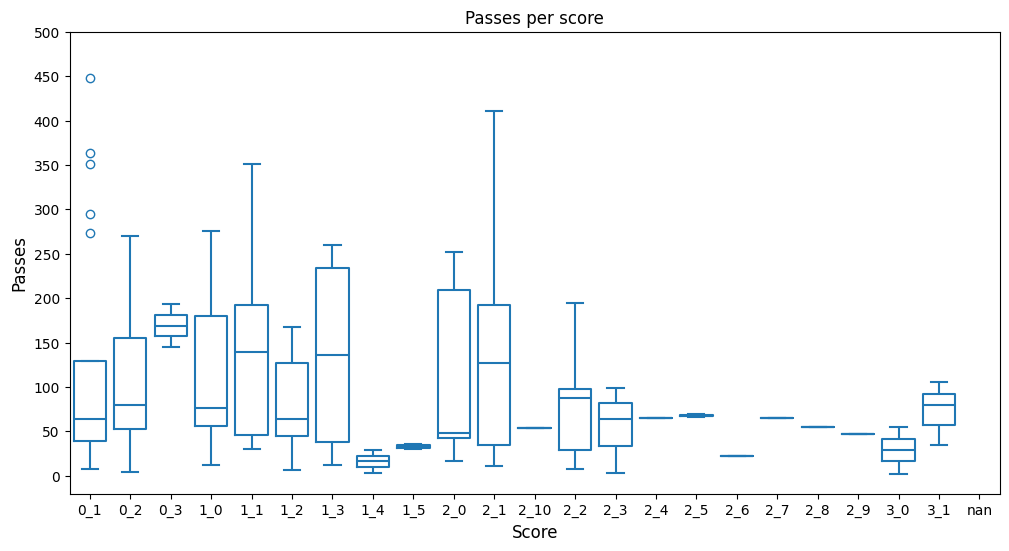

In [434]:
plotBoxPlotForEachScore(goalsVallecano)

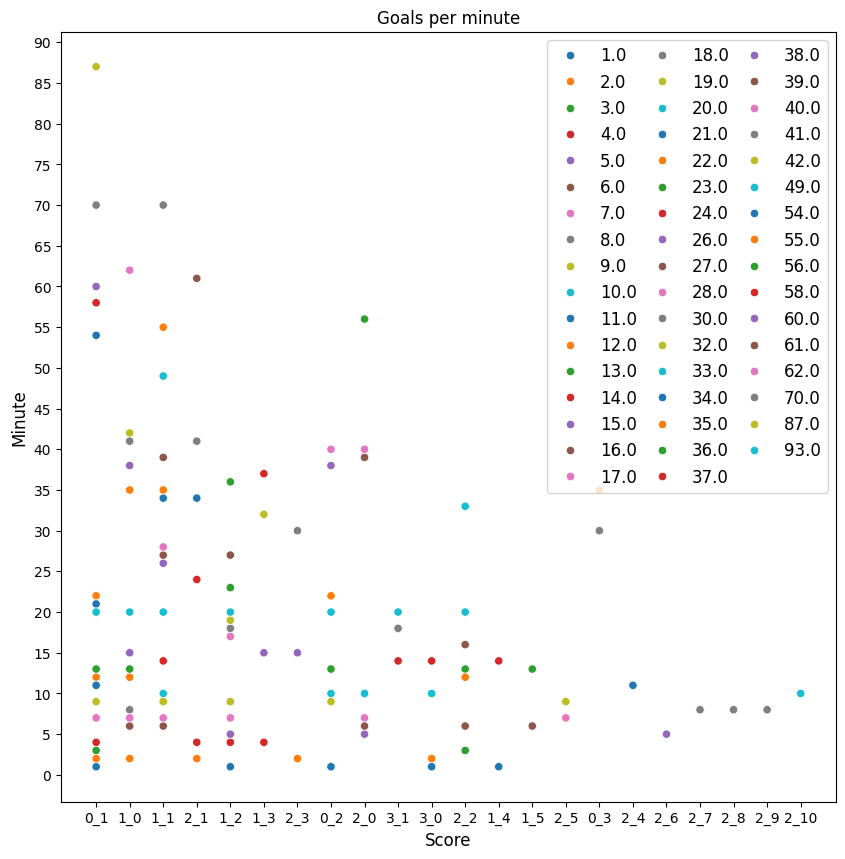

In [435]:
plotScatterPlotForEachScore(goalsVallecano)

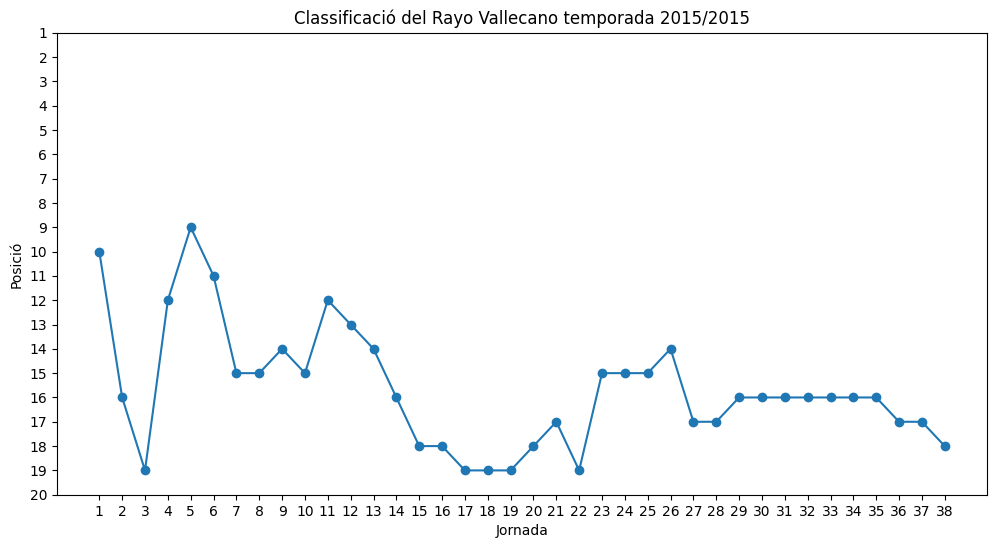

In [436]:
rounds = [i for i in range(1, 39)]
positions = [10, 16, 19, 12, 9, 11, 15, 15, 14, 15, 12, 13, 14, 16, 18, 18, 19, 19, 19, 18, 17, 19, 15, 15, 15, 14, 17, 17, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18]

plt.figure(figsize=(12, 6))
plt.plot(rounds, positions, marker='o', linestyle='-')
plt.title('Classificació del Rayo Vallecano temporada 2015/2015')
plt.xlabel('Jornada')
plt.ylabel('Posició')
plt.xticks(range(1, 39))
plt.ylim(19, 1)  # Reverse the y-axis
plt.yticks(range(1, 21))  # Set y-axis ticks with a gap of 1
plt.gca().patch.set_facecolor('none')  # Remove background
plt.grid(False)  # Remove grid
plt.show()